# 23032022

In [30]:
import numpy as np

def f(x1,x2):
    y = x1+1
    epsilon = np.random.normal(0, 1, 1)
    return y+epsilon

In [31]:
f(0,0)

array([0.95593381])

In [32]:
# generate a dataset

N = 1000

def make_data(N):
    rnd = np.random.uniform(0,10,N*2)
    D = np.reshape(rnd,(N,2))
    return D

Tr = make_data(N)
y = np.array(list(map(lambda point: f(point[0],point[1]),Tr)))
y[0:10]

array([[ 7.10511939],
       [ 3.43422281],
       [ 2.8608409 ],
       [ 3.68341804],
       [ 3.62057681],
       [ 7.4969677 ],
       [ 6.70504726],
       [ 6.02955136],
       [ 3.79728336],
       [10.04394371]])

In [33]:
def gety(X):
    return np.array(list(map(lambda point: f(point[0],point[1]),X)))

In [34]:
# Plot a projection

Proj = Tr[Tr[:,1]<0.25]
Proj



array([[1.77862651e+00, 1.15312644e-01],
       [7.68399576e+00, 1.33202144e-01],
       [5.00081450e+00, 1.39247281e-01],
       [8.86967089e+00, 1.38471005e-01],
       [7.02123345e+00, 7.25434779e-02],
       [8.56820516e+00, 1.59298448e-01],
       [2.41747254e+00, 2.21769142e-01],
       [9.68670585e+00, 5.33025948e-02],
       [2.03685107e-03, 2.24934321e-01],
       [9.94515615e+00, 1.24286630e-01],
       [3.49765359e+00, 1.13733533e-02],
       [3.64065745e+00, 1.82505234e-01],
       [5.70062173e+00, 2.41026575e-01],
       [4.26113594e+00, 2.15090410e-01],
       [1.92632255e+00, 1.86824212e-01],
       [5.91941788e+00, 2.18932505e-01],
       [3.14482327e+00, 6.01079943e-04],
       [2.28375910e+00, 1.50553996e-03],
       [8.12761230e+00, 1.37148130e-01]])

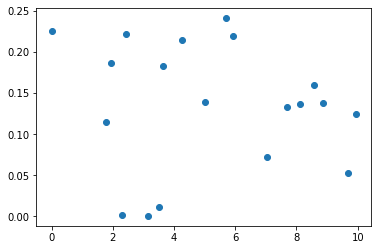

In [35]:
import matplotlib.pyplot as plt

plt.scatter(Proj[:,0],Proj[:,1]);

In [36]:
Projy = gety(Proj)
np.shape(Projy)



(19, 1)

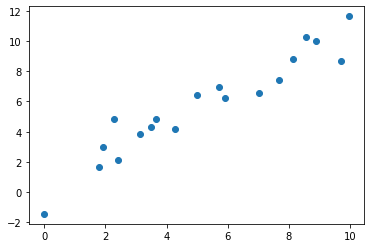

In [37]:
plt.scatter(Proj[:,0],Projy);

In [38]:
# Build the regression model

from sklearn.linear_model import LinearRegression as LR

model_lr1 = LR().fit(Tr,y)
model_lr1.coef_, model_lr1.intercept_

(array([[ 1.00127677, -0.02336095]]), array([1.11697346]))

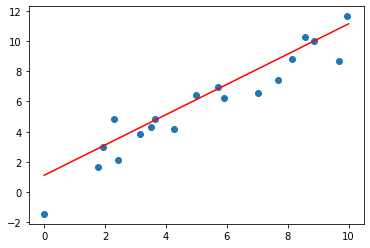

In [39]:
# Plot on the projection, ignoring that beta2 is not 0

b=model_lr1.coef_[0][0]
a=model_lr1.intercept_

def haty(x):
    return a+b*x

plt.scatter(Proj[:,0],Projy)
plt.plot((0,10),(haty(0),haty(10)),color='red');

In [40]:
def Err(model,X,y):
    return np.mean((model.predict(X)-y)**2)

In [41]:
Err_tr = Err(model_lr1,Tr,y)
Err_tr

0.9307753559831656

In [42]:
Nte=1000

Te = make_data(Nte)

Err_T = Err(model_lr1,Te,gety(Te))
Err_T



0.9664558977715996

In [43]:
# Estimate optimism wrt generalization error, but changing train in each iteration

N=100

def make_model(D,y):
    model = LR().fit(D,y)
    return model

def errs_model(N):
    Tr = make_data(N)
    y = gety(Tr)
    model = make_model(Tr,y)
    Err_tr = Err(model_lr1,Tr,y)
    Te = make_data(N)
    Err_T = Err(model,Te,gety(Te))
    return (Err_tr, Err_T)

def optimism():
    errs=errs_model(100)
    optimism1 = errs[0]-errs[1]
    return optimism1
    
R = 1000

Err_tr = np.array(list(map(lambda it: optimism(),np.repeat(0,R))))
np.mean(Err_tr)

-0.014858822215552302